In [67]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from LaneDetector import LaneDetector
from tools import pltImage, drawLines

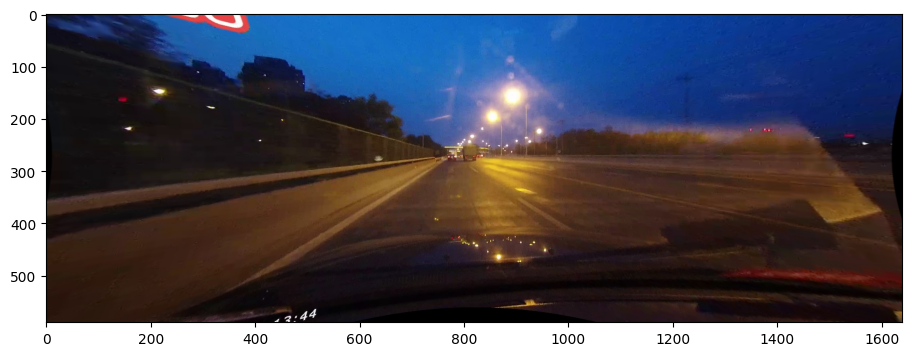

In [56]:
img = cv2.imread(r"..\CULane\driver_193_90frame\driver_193_90frame\06042010_0511.MP4\05130.jpg")
pltImage(img)

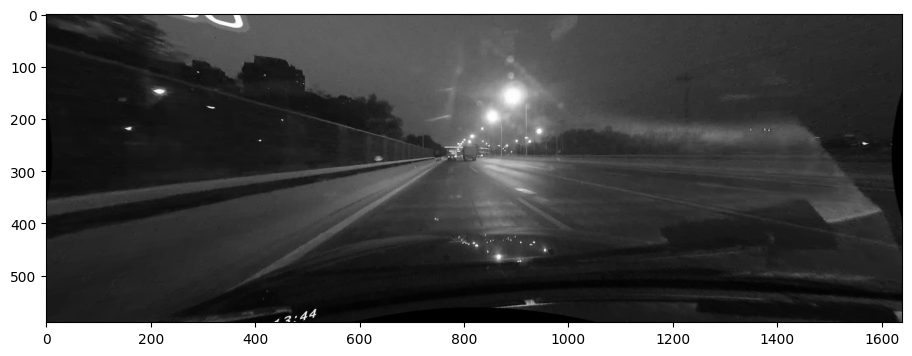

In [57]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
pltImage(gray_img)

# Denoising

Compare the performance of bilateral filter, Gaussian filter, and no filter.

## bilateral filter

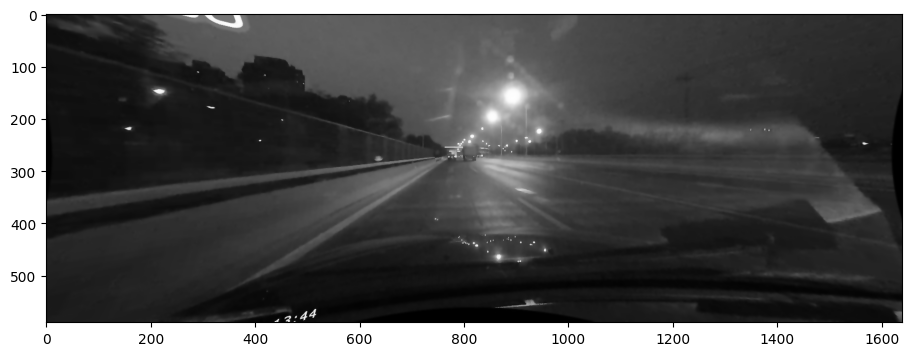

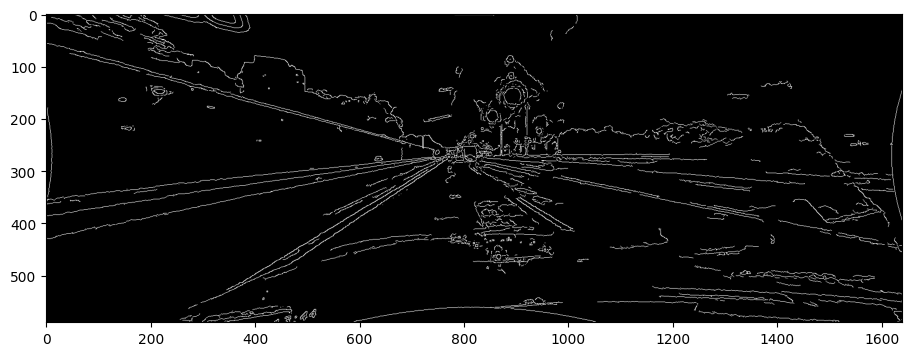

In [58]:
# bilateral filter parameters
bi_kernal_size = 7
bi_spatial_variance = 50
bi_intensity_variance = 25
bi_img = cv2.bilateralFilter(gray_img, bi_kernal_size, bi_intensity_variance, bi_spatial_variance)
pltImage(bi_img)

# canny paremeters
c_thrd_high = 30
c_thrd_low = c_thrd_high // 3
canny_img = cv2.Canny(bi_img, c_thrd_low, c_thrd_high)
pltImage(canny_img)

## Gaussian filter

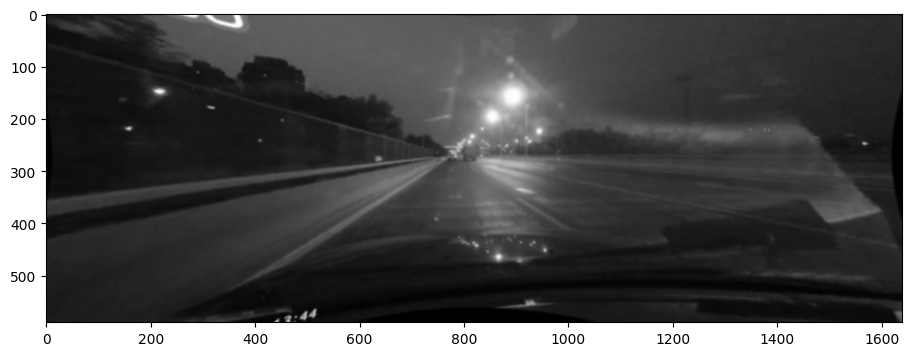

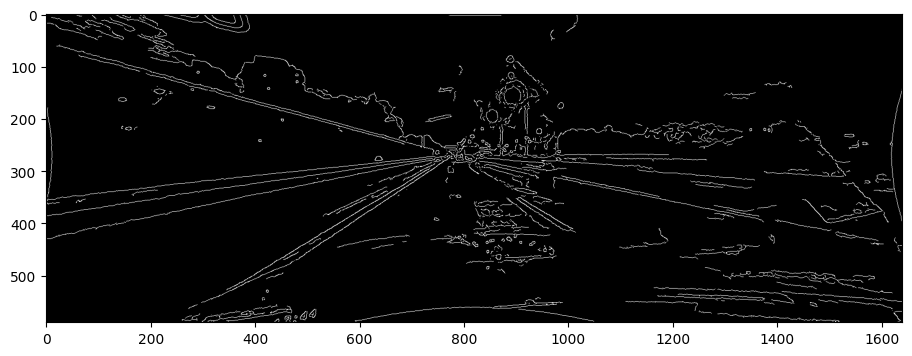

In [59]:
gaussian_img = cv2.GaussianBlur(gray_img, (7, 7), 1.8)
pltImage(gaussian_img)
canny_img = cv2.Canny(gaussian_img, c_thrd_low, c_thrd_high)
pltImage(canny_img)

## no filter

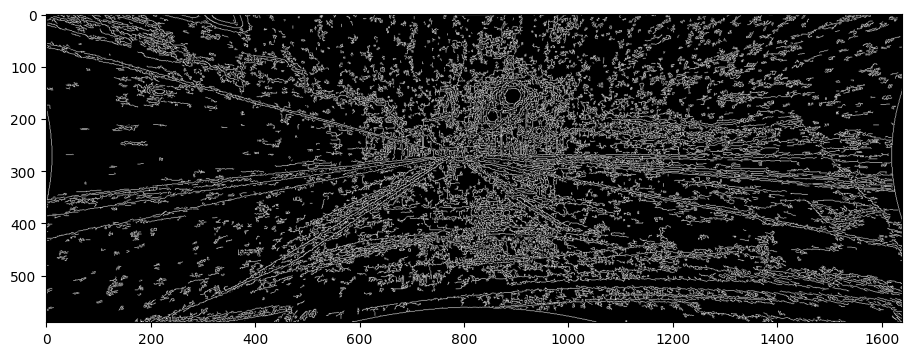

In [60]:
canny_img2 = cv2.Canny(gray_img, c_thrd_low, c_thrd_high)
pltImage(canny_img2)

# ROI

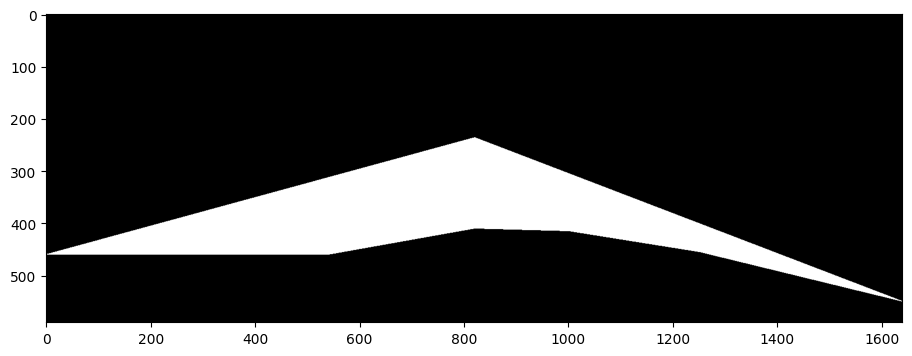

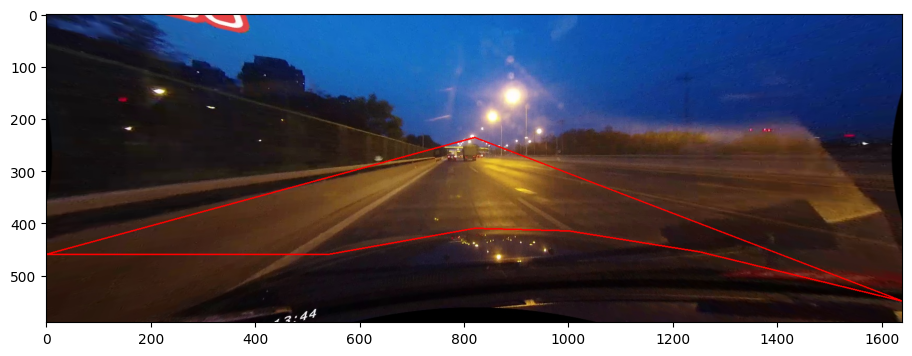

In [61]:
# ROI
height, width, _ = img.shape
polygon = np.array([[(width // 2, int(height * 0.4)), (0, 460), (540, 460), (820, 410), (1000, 415), (1250, 455), (width, 550)]])
mask = np.zeros_like(canny_img)
cv2.fillPoly(mask, polygon, 255)
pltImage(mask, "gray")
cimg = img.copy()
cv2.polylines(cimg, [polygon], True, (0,0,255), 2)
pltImage(cimg)

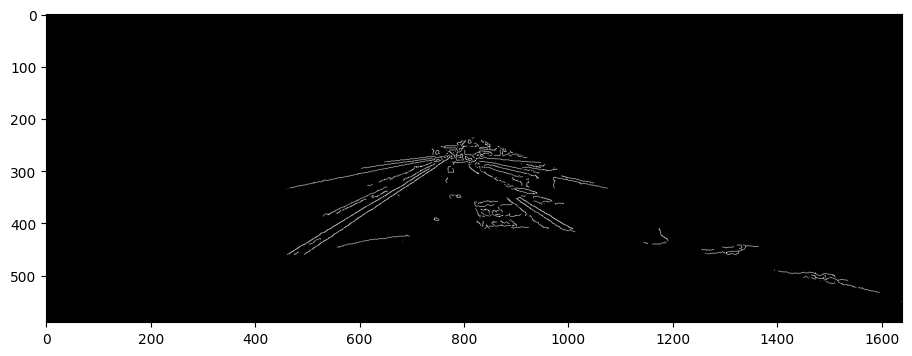

In [62]:
canny_img = cv2.bitwise_and(mask, canny_img)
pltImage(canny_img, "gray")

# Hough Transformation

In [63]:
rho = 1
angular_resolution = np.pi / 180
threshold = 25
lines = cv2.HoughLinesP(canny_img, rho, angular_resolution, threshold, None, 50, 10)
lines.shape

(31, 1, 4)

In [64]:
lines = lines.squeeze()
lines.shape

(31, 4)

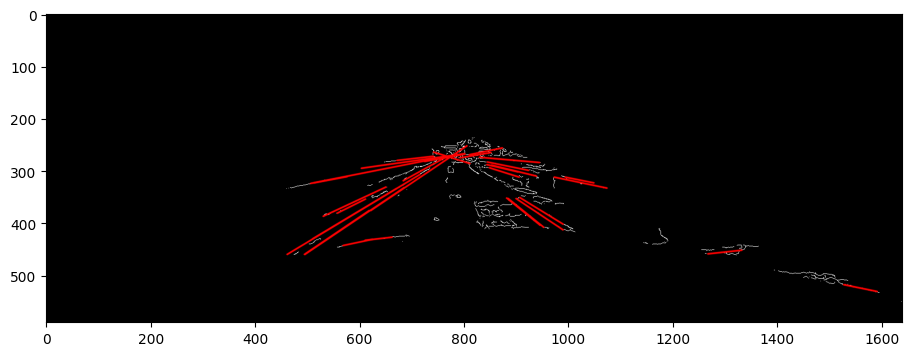

In [65]:
hough_lines = cv2.cvtColor(canny_img, cv2.COLOR_GRAY2BGR)
drawLines(hough_lines, lines)
pltImage(hough_lines)

## filter lines

In [68]:
left_candidates = []
right_candidates = []
for line in lines:
    if  -75 <= LaneDetector._getAngle(line) <= -20:
        left_candidates.append(line)
    elif 20 <= LaneDetector._getAngle(line) <= 75:
        right_candidates.append(line)
left_candidates = np.array(left_candidates)
right_candidates = np.array(right_candidates)

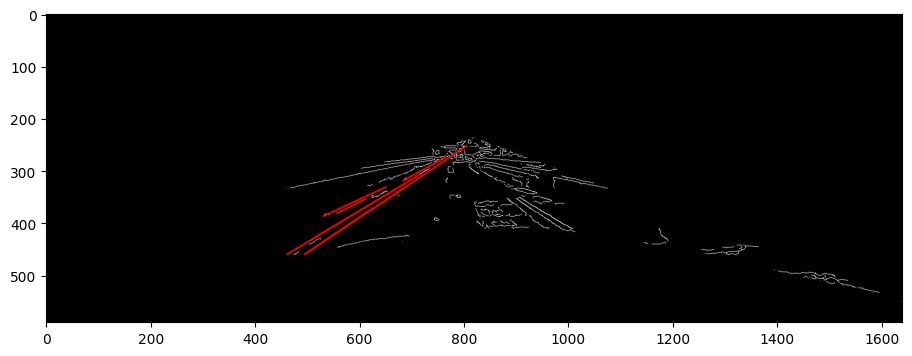

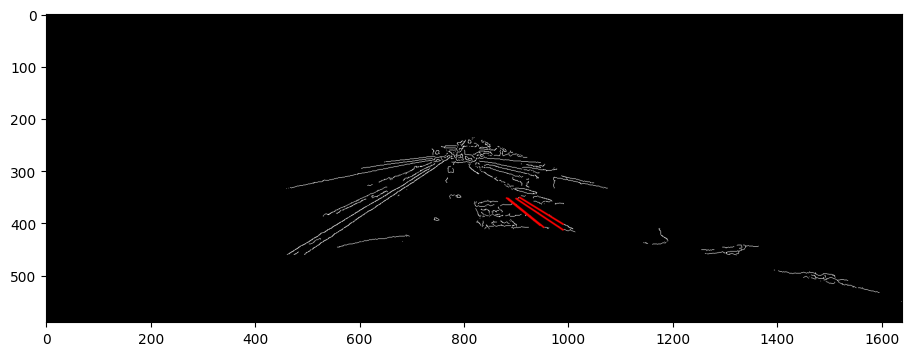

In [70]:
left_lines_img = cv2.cvtColor(canny_img, cv2.COLOR_GRAY2BGR)
drawLines(left_lines_img, left_candidates)
pltImage(left_lines_img)

right_lines_img = cv2.cvtColor(canny_img, cv2.COLOR_GRAY2BGR)
drawLines(right_lines_img, right_candidates)
pltImage(right_lines_img)

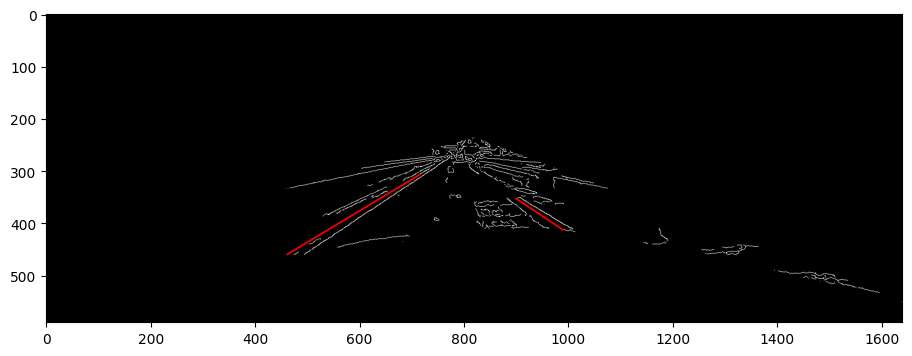

In [74]:
lane_left = LaneDetector._getLongestLine(left_candidates)
lane_right = LaneDetector._getLongestLine(right_candidates)

lane_lines_img = cv2.cvtColor(canny_img, cv2.COLOR_GRAY2BGR)
drawLines(lane_lines_img, [lane_left, lane_right])
pltImage(lane_lines_img)